In [26]:
import pickle as pk
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import os




Greedy_files = [

'cora_sampling_method=Greedy_K_sparsity=100_label_balance=Greedy_noise=0.01_results.p',
'cora_sampling_method=Greedy_K_sparsity=100_label_balance=Greedy_noise=100_results.p',
'cora_sampling_method=Greedy_K_sparsity=100_label_balance=Greedy_noise=1_results.p',
'cora_sampling_method=Greedy_K_sparsity=10_label_balance=Greedy_noise=0.01_results.p',
'cora_sampling_method=Greedy_K_sparsity=10_label_balance=Greedy_noise=100_results.p',
'cora_sampling_method=Greedy_K_sparsity=10_label_balance=Greedy_noise=1_results.p',
'cora_sampling_method=Greedy_K_sparsity=5_label_balance=Greedy_noise=0.01_results.p',
'cora_sampling_method=Greedy_K_sparsity=5_label_balance=Greedy_noise=100_results.p',
'cora_sampling_method=Greedy_K_sparsity=5_label_balance=Greedy_noise=1_results.p']


random_file = ['cora_sampling_method=Random_random_results.p']


In [27]:
def open_files(files):
    file_content = []
    for file in  files:
        try:
            with open(file, 'rb') as f:
                file_content.append(pk.load(f, encoding='latin1'))
        except Exception as e:
            print(e)
            print("No " + file)
    return file_content

geedy_results_partitions = []
for i in range(4):
    partition_file = ["Partition_"+str(i)+"_"+file for file in Greedy_files]
    geedy_results_partitions.append(open_files(partition_file))

random_results_partitions = []
for i in range(4):
    partition_file = ["Partition_"+str(i)+"_"+file for file in random_file]
    random_results_partitions.append(open_files(partition_file))
#random_results = open_files(random_file)



In [28]:
def results_to_lines(results):
    lines = []
    for result in results:
        line = result['results']
        x = []
        y = []
        var = []
        for point in line:
            x.append(point[1])
            y.append(point[2])
            var.append(point[3])
        lines.append((x,y,var,result['info']))
    return lines



def plot(title, save_file,lines, label_name = None):
    plt.errorbar(random_ref_line[0],random_ref_line[1],yerr=random_ref_line[2],alpha = 0.7,color = 'k',label="Random sampling",fmt='o-')
    for line in lines:
        if label_name is not None:
            plt.errorbar(line[0],line[1],yerr=line[2],alpha = 0.5,label=label_name+":"+str(line[3][label_name]),fmt='o-')
        else:
            plt.errorbar(line[0],line[1],yerr=line[2],alpha = 0.5,fmt='o-')
    
    
#     plt.xlabel('known labels of training set %')
#     plt.ylabel('test accuracy')
   # plt.title(title)
    plt.legend(loc=4)
    plt.grid(True)
    plt.savefig(os.path.join('../report',save_file), bbox_inches="tight", dpi = 300)



In [29]:

result_0 = results_to_lines(random_results_partitions[0])
#print(result_0[0])
result_1 = results_to_lines(random_results_partitions[1])
result_2 = results_to_lines(random_results_partitions[2])
result_3 = results_to_lines(random_results_partitions[3])

all_te = np.array([result_0[0][1],result_1[0][1],result_2[0][1],result_3[0][1]])
avg = np.mean(all_te, axis=0)
std = np.std(all_te, axis=0)

random_ref_line = (result_0[0][0], list(avg),list(std),result_0[0][3])
#print(random_ref_line)

In [30]:
#plot("EDS sampling","EDS_sampling_K_100.jpg",results_to_lines(eds_results)[0:1],'K_sparsity')

In [31]:
#plot("EDS sampling","EDS_sampling_K10.jpg",results_to_lines(eds_results)[1:2],'K_sparsity')

In [32]:
#plot("EDS sampling","EDS_sampling_K5.jpg",results_to_lines(eds_results)[2:3],'K_sparsity')

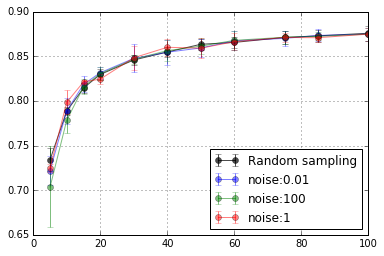

In [33]:

result_0 = results_to_lines(geedy_results_partitions[0])
#print(result_0[0])
result_1 = results_to_lines(geedy_results_partitions[1])
result_2 = results_to_lines(geedy_results_partitions[2])
result_3 = results_to_lines(geedy_results_partitions[3])
greedy_average = []
for i in range(9):
    all_te = np.array([result_0[i][1],result_1[i][1],result_2[i][1],result_3[i][1]])
    avg = np.mean(all_te, axis=0)
    std = np.std(all_te, axis=0)
    greedy_average.append((result_0[i][0], list(avg),list(std),result_0[i][3]))
#print(greedy_average[0])
plot("Greedy sampling, K sparsity = 100 ","Greedy_K100_sampling_partition.png",greedy_average[0:3],'noise')


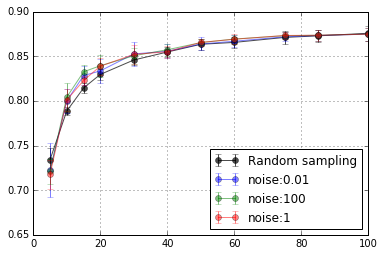

In [34]:
plot("Greedy sampling, K sparsity = 10 ","Greedy_K10_sampling_partition.png",greedy_average[3:6],'noise')


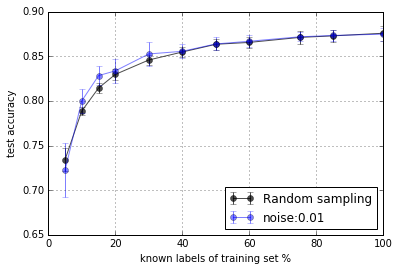

In [18]:
plot("Greedy sampling, K sparsity = 10 ","Greedy_K10_sampling_partition.png",greedy_average[3:4],'noise')


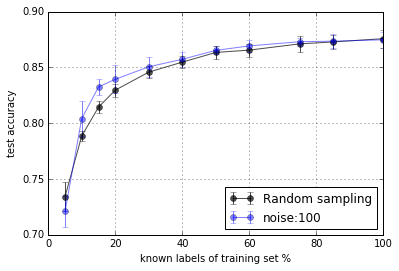

In [19]:
plot("Greedy sampling, K sparsity = 10 ","Greedy_K10_sampling_partition.png",greedy_average[4:5],'noise')


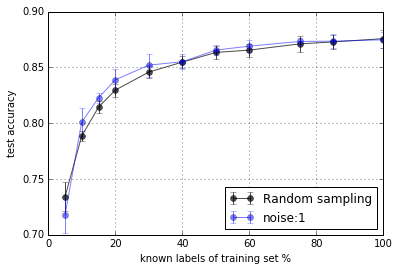

In [20]:
plot("Greedy sampling, K sparsity = 10 ","Greedy_K10_sampling_partition.png",greedy_average[5:6],'noise')


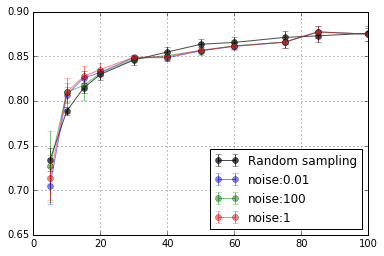

In [35]:
plot("Greedy sampling, K sparsity = 5 ","Greedy_K5_sampling_partition.png",greedy_average[6:9],'noise')

In [101]:
#plot("Max degree sampling,","Max_sampling.jpg",results_to_lines(max_results))